Assignment 0  
*Yigao Li*  
*Sep 7, 2018*

# 1. Regularization
Import `Hitters` dataset

In [1]:
import pandas as pd
hitters = pd.read_csv("https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv")

## 1.1 LASSO Regression
Use LASSO regression to predict `Salary` from the other numeric predictors.  
Drop categorical columns first, and then drop data with missing numeric values.  

In [2]:
import numpy as np
from sklearn import linear_model
hitters_num = hitters.select_dtypes([np.number]).dropna()
X = hitters_num.drop("Salary", axis = 1)
y = hitters_num.Salary
#clf = linear_model.Lasso(alpha = 0.1, max_iter = 4000, normalize = False)
#clf.fit(X, y)

### 1.1.1 Visualization
Create a visualization of the coefficient trajectories.

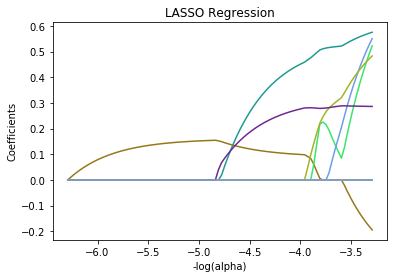

In [3]:
import matplotlib.pyplot as plt
np.random.seed(1234)
alphas, coefs, _ = linear_model.lasso_path(X, y)
plt.figure(1)
neg_log_alphas = -np.log10(alphas)
color = (np.append(np.random.uniform(0,1,3), 1) for i in range(16))
for coef, c in zip(coefs, color):
    l = plt.plot(neg_log_alphas, coef, color = c)
plt.xlabel("-log(alpha)")
plt.ylabel("Coefficients")
plt.title("LASSO Regression")
plt.show()

### 1.1.2 Final Predictors in the Model

In [4]:
print(X.columns)
coefs_df = pd.DataFrame(coefs)
coefs_df.loc[:,45:55]

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors'],
      dtype='object')


,45,46,47,48,49,50,51,52,53,54,55
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.018454,0.053445,0.086068,0.116500,0.144881,0.171350
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.153193,0.15366,0.154096,0.154502,0.152285,0.149096,0.145056,0.141289,0.137775,0.134498,0.131442
8,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


According to the table above, `Years`, `CWalks` and `AtBat` are the final three predictors remaining in the model.

### 1.1.3 Optimal Regularization by Cross-Validation

In [5]:
model_lasso = linear_model.LassoCV(max_iter = 4000).fit(X, y)
model_lasso.alpha_

540.65566773329112

### 1.1.4 Predictors in Cross-Validation Model

In [6]:
model_lasso.coef_

array([-0.        ,  1.49581634,  0.        ,  0.        ,  0.        ,
        1.13968178, -0.        , -0.33741746,  0.82331967,  0.        ,
        0.79940936,  0.65462067, -0.03322761,  0.27574744,  0.13169212, -0.        ])

`Hits`, `Walks`, `CAtBat`, `CHits`, `CRuns`, `CRBI`, `CWalks`, `PutOuts` and `Assists` are left in the model.

## 1.2 Ridge Regression

### 1.2.1 Visualization  
Create a visualization of the coefficient trajectories.

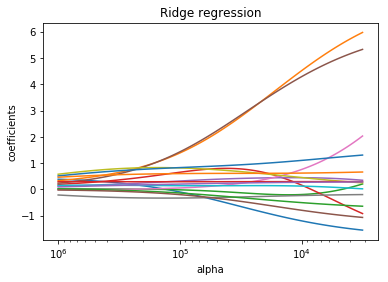

In [7]:
n_alphas = 100
alphas_ridge = np.logspace(6, 3.5, 100)
coefs_ridge = []
for a in alphas_ridge:
    ridge = linear_model.Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X, y)
    coefs_ridge.append(ridge.coef_)
ax = plt.gca()
ax.plot(alphas_ridge, coefs_ridge)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge regression')
plt.show()

### 1.2.2 Optimal Regularization by Cross-Validation

In [8]:
model_ridge = linear_model.RidgeCV(alphas = alphas_ridge).fit(X, y)
model_ridge.alpha_

10722.672220103232

# 2. Short Answer
## 2.1 Bias-Variance Tradeoff  
When statistical models are more flexible, parameters have higher variances, and vice versa.  
## 2.2 Regularization
Without regularization, some model coefficients can be extremely large comparing to other parameters. Regularization tries to avoid overfitting the data where higher coefficients get higher penalties. This method increases the bias and lowers the variance.  
## 2.3 Reference  
In Part 1, the existence of $\alpha$ in both LASSO and Ridge models changes models of high bias and low variance.